# 지역별 인구 및 cctv 규모 시각화하기

## 1. 라이브러리 임포트

In [2]:
# 라이브러리 임포트
import pandas as pd                      # pandas를 pd로 준비
import numpy as np                       # numbpy를 np로 준비
import matplotlib.pyplot as plt          # pyplot을 plt로 준비
import platform                          # platform 준비
from matplotlib import font_manager,rc   # 글꼴 처리 준비

# 주피터 노트북에서 시각화 결과가 직접 출력되도록 설정
%matplotlib inline

# 판다스 데이터프레임 실수 출력 형식 지정
pd.options.display.float_format = '{:,.1f}'.format  

## 2. 시각화를 위한 글꼴 준비 

In [3]:
# 운영체제에 적합한 한글 글꼴 지정
plt.rcParams['axes.unicode_minus'] = False                          # '-' 부호가 정상적으로 출력되도록 설정
if platform.system() == 'Darwin':                                   # 운영체제가 MAC OS X라면
    rc('font', family='AppleGothic')                                # 애플고딕 글꼴 지정
elif platform.system() == 'Windows':                                # 운영체제가 윈도우라면 
    path = "c:/Windows/Fonts/malgun.ttf"                            # 글꼴 파일 경로 지정
    font_name = font_manager.FontProperties(fname=path).get_name()  # 글꼴 이름 획득
    rc('font', family=font_name)                                    # 획득한 글꼴 이름으로 지정
else:                                                               # 기타 운영체제라면
    print('Unknown system... sorry~~~~')                            # 글꼴 설정 실패 메시지 출력

## 3. 인구 데이터 준비

In [4]:
# 연도를 매개변수로 지정하여 인구 데이터를 입력하는 함수 정의
def read_pop(year):
    # 파일 읽기
    pop = pd.read_csv(
        './pop_'+str(year)+'.txt',
        sep = '\t',                 # 구분자를 탭으로 지정
        thousands = ',',           # 천 단위 구분 쉼표 처리
        header = 2,              # (0부터 시작하는 번호 기준으로) 2번 행을 헤더로 지정
        usecols=['자치구', '계']              # 지정 열만 읽어들이도록
    )
    # 열 이름 변경
    pop.rename(
        columns={pop.columns[1] : '인구 규모 '+str(year)},
        inplace=True
    )
    # 널 값을 포함한 행 조사
    if pop.isnull().values.any():
        print(f'fillna() 호출 전, 널 값이 포함된 행: \n{pop[pop.isnull().any(axis=1)]}')
        pop.fillna(0, inplace=True)   
        print(f'fillna() 호출 후, 널 값이 포함된 행: \n{pop[pop.isnull().any(axis=1)]}')
    # 합계 행 삭제
    rows = pop[ pop['자치구'] == '합계' ].index
    pop.drop(rows, inplace=True)
    # 데이터 프레임 반환
    return pop

# 연도를 지정하여 인구 데이터를 입력하는 함수 실행
df_pop2015 = read_pop(2015)  # 1) 2015 인구 획득
df_pop2020 = read_pop(2020)  # 2) 2020 인구 획득

# 인구 데이터 병합
df_pop = pd.merge(        
    df_pop2015, df_pop2020,
    how='outer',
    on='자치구'
)

# 결과 출력
df_pop.head()

,자치구,인구 규모 2015,인구 규모 2020
0,종로구,163822,158996
1,중구,134329,134635
2,용산구,247909,244645
3,성동구,305065,300505
4,광진구,375180,360109


## 4. CCTV 데이터 준비

In [5]:
# CCTV 데이터 파일 읽어오기
df_cctv = pd.read_csv(
      './CCTV.csv',    # 파일 경로 지정
      thousands = ',', # 천 단위 구분 쉼표 처리
      header=1,        # (0부터 시작하는 번호 기준으로) 1번 행을 헤더로 지정
      encoding='euc-kr'# 인코딩 방식 지정
)

# 열 이름 변경
df_cctv.rename(
    columns={
        '구분': '자치구',
        '2011년 이전': '2010년 이전'
    },  # '구분'을 '자치구'로, '2011년 이전'을 '2010년 이전'으로 변경
    inplace = True    # 원본을 직접 수정
)  

# 2015년 합계 계산
lst_col = ['2010년 이전', '2011년', '2012년', '2013년', '2014년', '2015년']
df_cctv['CCTV 규모 2015'] = df_cctv.loc[:, lst_col].sum(axis='columns')

# 2020년 합계 계산
lst_col = ['CCTV 규모 2015', '2016년', '2017년', '2018년', '2019년', '2020년']
df_cctv['CCTV 규모 2020'] = df_cctv.loc[:, lst_col].sum(axis='columns')

# 널 값을 포함한 행이 존재하면 널 값을 0으로 치환
if df_cctv.isnull().values.any():
    print(f'fillna() 호출 전, 널 값이 포함된 행: \n{df_cctv[ df_cctv.isnull().any(axis=1) ]}')
    df_cctv.fillna(0, inplace=True)    
    print(f'fillna() 호출 후, 널 값이 포함된 행: \n{df_cctv[ df_cctv.isnull().any(axis=1) ]}')

# 2020년 규모와 총계가 맞는지 확인
df_cctv[df_cctv['총계'] != df_cctv['CCTV 규모 2020']]

,자치구,총계,2010년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,CCTV 규모 2015,CCTV 규모 2020
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232,20858,70834


In [6]:
# 합계 행 삭제
rows = df_cctv[ df_cctv['자치구'] == '계' ].index
df_cctv.drop(rows, inplace=True)  # 합계 행을 삭제

# 불필요한 열 삭제 ('자치구', 'CCTV 규모 2015', 'CCTV 규모 2020' 열만 남기고 다른 열은 제거)
cols = ['총계', '2010년 이전',
        '2011년', '2012년', '2013년', '2014년', '2015년',
        '2016년', '2017년', '2018년', '2019년', '2020년']
df_cctv.drop(cols, axis='columns', inplace=True)

# '자치구' 열 내부의 공백 제거 (예를 들어 '중 구'를 '중구'로 수정)
df_cctv['자치구'].replace(' ','', regex=True, inplace=True)
# 결과 출력
df_cctv.head()

,자치구,CCTV 규모 2015,CCTV 규모 2020
1,종로구,1175,1729
2,중구,654,2001
3,용산구,685,2383
4,성동구,1289,3515
5,광진구,477,2556


## 5. 인구-CCTV 데이터 병합

In [7]:
# 인구와 CCTV 병합
cctv_with_pop = pd.merge(    # 병합 함수 호출
    df_pop, df_cctv,               # 병합 대상은 인구 및 CCTV
    how='outer',                   # 외부 조인 방식
    on='자치구'                    # 조인 기준 열 지정
)

# 자치구를 인덱스로 설정
cctv_with_pop.set_index('자치구', inplace=True)

# 병합 결과 출력
cctv_with_pop.head()

,인구 규모 2015,인구 규모 2020,CCTV 규모 2015,CCTV 규모 2020
자치구,,,,
종로구,163822,158996,1175,1729
중구,134329,134635,654,2001
용산구,247909,244645,685,2383
성동구,305065,300505,1289,3515
광진구,375180,360109,477,2556


## 6. CCTV 비율 계산

In [8]:
# 인구 백명당 CCTV 비율 계산
cctv_with_pop['CCTV 비율 2015'] = cctv_with_pop['CCTV 규모 2015'] / cctv_with_pop['인구 규모 2015'] * 100.0
cctv_with_pop['CCTV 비율 2020'] = cctv_with_pop['CCTV 규모 2020'] / cctv_with_pop['인구 규모 2020'] * 100.0

# 계산 결과 출력
cctv_with_pop.head()

,인구 규모 2015,인구 규모 2020,CCTV 규모 2015,CCTV 규모 2020,CCTV 비율 2015,CCTV 비율 2020
자치구,,,,,,
종로구,163822,158996,1175,1729,0.7,1.1
중구,134329,134635,654,2001,0.5,1.5
용산구,247909,244645,685,2383,0.3,1.0
성동구,305065,300505,1289,3515,0.4,1.2
광진구,375180,360109,477,2556,0.1,0.7


## 7. 회귀 분석

In [9]:
# 회귀선 준비
pf2015 = np.polyfit(  # numpy.polyfit(x, y, 차수)
         cctv_with_pop['인구 규모 2015'],   # 추정에 사용할 x 좌표 값
         cctv_with_pop['CCTV 규모 2015'],   # 추정에 사용할 y 좌표 값
         1                                  # 1차원(직선 형태) 다항식
)
pf2020 = np.polyfit(  # numpy.polyfit(x, y, 차수)
         cctv_with_pop['인구 규모 2020'],   # 추정에 사용할 x 좌표 값
         cctv_with_pop['CCTV 규모 2020'],   # 추정에 사용할 y 좌표 값
         1                                  # 1차원(직선 형태) 다항식
)                                  

# y 축
fy2015 = np.poly1d(pf2015)     # 2015년 회귀선 y 값 리스트 계산
fy2020 = np.poly1d(pf2020)     # 2020년 회귀선 y 값 리스트 계산

# x 축
fx2015 = np.linspace(100000, 700000, 100)    # 2015년 회귀선 x 값 리스트 계산
fx2020 = np.linspace(100000, 700000, 100)    # 2020년 회귀선 x 값 리스트 계산

# 오차
cctv_with_pop['오차 2015'] = np.abs(       # 2015년 오차 계산
    cctv_with_pop['CCTV 규모 2015'] - fy2015(cctv_with_pop['인구 규모 2015'])
)
cctv_with_pop['오차 2020'] = np.abs(       # 2020년 오차 계산
    cctv_with_pop['CCTV 규모 2020'] - fy2020(cctv_with_pop['인구 규모 2020'])
)
# 결과 출력
cctv_with_pop.head()

,인구 규모 2015,인구 규모 2020,CCTV 규모 2015,CCTV 규모 2020,CCTV 비율 2015,CCTV 비율 2020,오차 2015,오차 2020
자치구,,,,,,,,
종로구,163822,158996,1175,1729,0.7,1.1,373.7,331.7
중구,134329,134635,654,2001,0.5,1.5,121.5,38.5
용산구,247909,244645,685,2383,0.3,1.0,189.8,22.7
성동구,305065,300505,1289,3515,0.4,1.2,364.2,884.3
광진구,375180,360109,477,2556,0.1,0.7,509.1,314.9


## 8. 이동 거리 계산 

In [10]:
# 자치구마다 이동 거리 계산
cctv_with_pop['이동 거리'] = np.sqrt(
    (  1.0 * (cctv_with_pop['인구 규모 2015'] - cctv_with_pop['인구 규모 2020']))**2    #   1배로 스케일링
    + (100.0 * (cctv_with_pop['CCTV 규모 2015'] - cctv_with_pop['CCTV 규모 2020']))**2  # 100배로 스케일링
)

# 최대 이동 거리 확인
max_distance = cctv_with_pop['이동 거리'].max()

# 결과 출력
cctv_with_pop.head()

,인구 규모 2015,인구 규모 2020,CCTV 규모 2015,CCTV 규모 2020,CCTV 비율 2015,CCTV 비율 2020,오차 2015,오차 2020,이동 거리
자치구,,,,,,,,,
종로구,163822,158996,1175,1729,0.7,1.1,373.7,331.7,"55,609.8"
중구,134329,134635,654,2001,0.5,1.5,121.5,38.5,"134,700.3"
용산구,247909,244645,685,2383,0.3,1.0,189.8,22.7,"169,831.4"
성동구,305065,300505,1289,3515,0.4,1.2,364.2,884.3,"222,646.7"
광진구,375180,360109,477,2556,0.1,0.7,509.1,314.9,"208,445.5"


## 9. 산점도 시각화

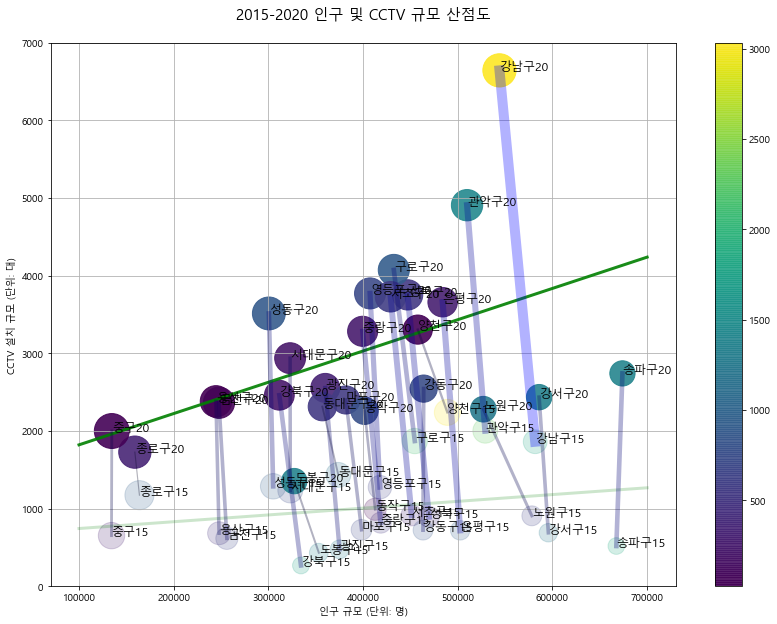

In [15]:
# 산점도 준비 및 y축 범위 설정
plt.figure(figsize=(14,10)) # 그림 크기 (14, 10)으로 설정
plt.ylim(0,7000)            # y 축 범위 (0, 7000)으로 설정

# 산점도 시각화 함수 정의
def myScatter(year, a, fx, fy):
    # 1) 산점도 그리기
    plt.scatter(                       # 산점도 출력 함수
        cctv_with_pop['인구 규모 20' + str(year)],                   # x
        cctv_with_pop['CCTV 규모 20' + str(year)],                   # y
        c=cctv_with_pop['오차 20' + str(year)],                      # 마커 색상 (오차 데이터를 마커 색상으로 지정)
        s=np.sqrt(cctv_with_pop['CCTV 비율 20' + str(year)])*1000,   # 마커 크기  (해당 연도 CCTV 비율의 제곱근에 비례)
        alpha=a              # 투명도
    )
    # 2) 추세선 그리기
    plt.plot(fx, fy(fx), ls='-', lw=3, color='g', alpha=a)  # 추세선 출력 함수(실선, 두께 3, 색상 초록, 투명도 알파)
    # 3) 마커 레이블 출력
    for n in range(len(cctv_with_pop)):                      # df 행 개수만큼 반복
        plt.text(                           # 자치구 레이블 출력 함수
            cctv_with_pop['인구 규모 20' + str(year)][n],                       # 텍스트 위치 x (자치구 원 중심의 x 좌표 값)
            cctv_with_pop['CCTV 규모 20' + str(year)][n],                       # 텍스트 위치 y (자치구 원 중심의 y 좌표 값)
            cctv_with_pop.index[n]+str(year),                       # 텍스트 내용 (예: '강남구20' 또는 '강남구15')
            fontsize=12             # 폰트 크기
        )

# 산점도 시각화 함수 실행
myScatter('15', 0.2, fx2015, fy2015)  # 2015년 산점도 시각화 함수 실행, 투명도는 0.2로 지정
myScatter('20', 0.9, fx2020, fy2020)  # 2020년 산점도 시각화 함수 실행, 투명도는 0.9로 지정

# 자치구 이동 궤적 출력
for n in range(len(cctv_with_pop)):                     # df 행 개수만큼 반복
    distance = cctv_with_pop['이동 거리'][n]     # n번 자치구 이동 거리
    x_values = [    # n번 자치구의 x 좌표 리스트 시작
        cctv_with_pop['인구 규모 2015'][n],           # 2015년 x 좌표
        cctv_with_pop['인구 규모 2020'][n]            # 2020년 x 좌표
    ]               # n번 자치구의 x 좌표 리스트 종료
    y_values = [    # n번 자치구의 y 좌표 리스트 시작
        cctv_with_pop['CCTV 규모 2015'][n],           # 2015년 y 좌표
        cctv_with_pop['CCTV 규모 2020'][n]            # 2020년 y 좌표
    ]               # n번 자치구의 y 좌표 리스트 종료
    plt.plot(               # 2015년 위치에서 2020년 위치로 이동 궤적 출력 함수
        x_values,           # n번 자치구의 x 좌표 리스트
        y_values,           # n번 자치구의 y 좌표 리스트
        lw=(distance / max_distance)*10,     # 이동 궤적 두께를 최대 이동거리 대비 해당 자치구 이동거리 비율의 10배로 지정
        color=(0, 0,(distance / max_distance), 0.3)      # 이동 궤적 색상의 blue 값을 최대 이동거리 대비 해당 자치구 이동거리 비율로, 투명도를 0.3으로 지정
    )

# 마무리
plt.colorbar()  # 색상 조견 막대 출력 함수 (수직 방향)
plt.title('2015-2020 인구 및 CCTV 규모 산점도\n', fontsize=15)  # 산점도 제목 지정
plt.xlabel('인구 규모 (단위: 명)')  # x축 제목 지정
plt.ylabel('CCTV 설치 규모 (단위: 대)')  # y축 제목 지정
plt.grid()  # 눈금 그리드 보이도록 지정
plt.savefig('./Final Project.png')
plt.show()  # 시각화 결과 출력